In [16]:
import pandas as pd

train_df = pd.read_csv('data_train-2.csv')

In [17]:
train_df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65


We can see that we are given 7 features as well as a probability of admission.

In [18]:
train_features_df = train_df.iloc[:, 1:-1]
train_features_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,109,331,116,5,5.0,5.0,9.38,1
1,346,316,98,1,1.5,2.0,7.43,0
2,99,332,119,4,5.0,4.5,9.24,1
3,210,301,104,3,3.5,4.0,8.12,1
4,242,317,103,2,2.5,2.0,8.15,0


we dont need the row number or the chance of admit for the training features.

In [19]:
median_chance = train_df['Chance of Admit '].median()
train_labels_df = (train_df['Chance of Admit '] > median_chance).astype(int)
train_labels_df.head()

0    1
1    0
2    1
3    0
4    0
Name: Chance of Admit , dtype: int64

To make this task into binary classification we can map all chances of admission above the medain to 1 and those below to 0

In [20]:
from sklearn.model_selection import train_test_split

train_features, validation_features, train_labels, validation_labels = train_test_split(train_features_df, train_labels_df, test_size=0.2)

now we can make train and validation datasets and train the models, we'll try a linear, rbf and degree 3 polynomial kernel.

In [21]:
from sklearn.svm import SVC

In [22]:
svm_linear = SVC(kernel='linear')

In [23]:
svm_rbf = SVC(kernel='rbf')

In [24]:
svm_poly = SVC(kernel='poly', degree=3)

Since we can only visualize a 2d space we will just try ome different combinations of 2 input features to see which works best.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_svcs(svcs, X, y):
  fig, axs = plt.subplots(1, 3, figsize=(12, 4))
  names = ['Linear', 'RBF', 'Polynomial']
  fig.suptitle(f'Kernels for {X.columns[0]} and {X.columns[1]}', fontsize=10)

  for i, svc in enumerate(svcs):
    x_min, x_max = X.iloc[:, 0].min()-0.25, X.iloc[:, 0].max()+0.25
    y_min, y_max = X.iloc[:, 1].min()-0.25, X.iloc[:, 1].max()+0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    axs[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    sv = svc.support_vectors_
    axs[i].scatter(sv[:, 0], sv[:, 1], c='k', marker='|', s=100, linewidths=1)
    axs[i].set_xlabel(X.columns[0])
    axs[i].set_ylabel(X.columns[1])
    axs[i].set_title(names[i], fontsize=10)
    axs[i].text(x_max, y_min, f"Support Vectors: {svc.support_.size}", ha='right', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

####1. CGPA and SOP

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


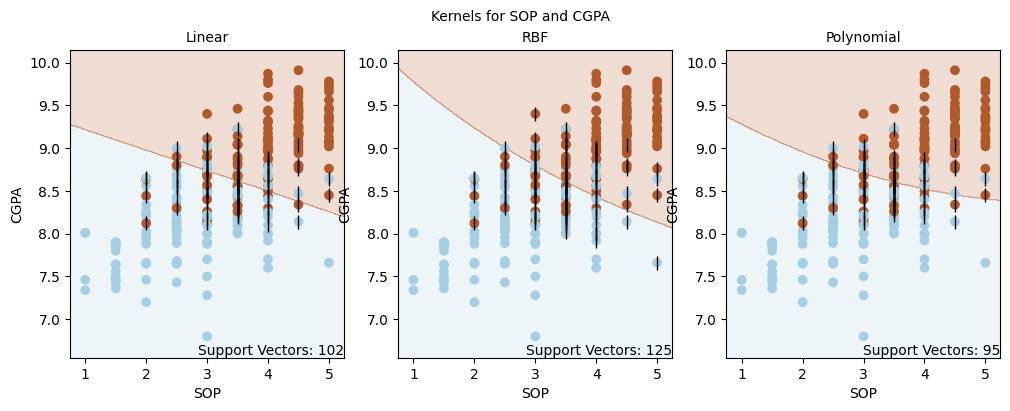

In [26]:
X = train_features[['SOP', 'CGPA']]
svm_linear.fit(X, train_labels)
svm_rbf.fit(X, train_labels)
svm_poly.fit(X, train_labels)

plot_svcs([svm_linear, svm_rbf, svm_poly], X, train_labels)

####2. CGPA and GRE Score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


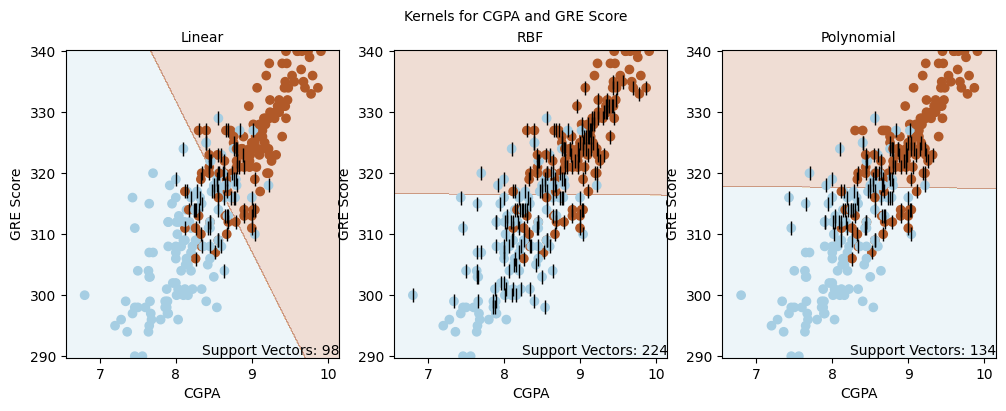

In [27]:
X = train_features[['CGPA', 'GRE Score']]
svm_linear.fit(X, train_labels)
svm_rbf.fit(X, train_labels)
svm_poly.fit(X, train_labels)

plot_svcs([svm_linear, svm_rbf, svm_poly], X, train_labels)

####3. SOP and LOR

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


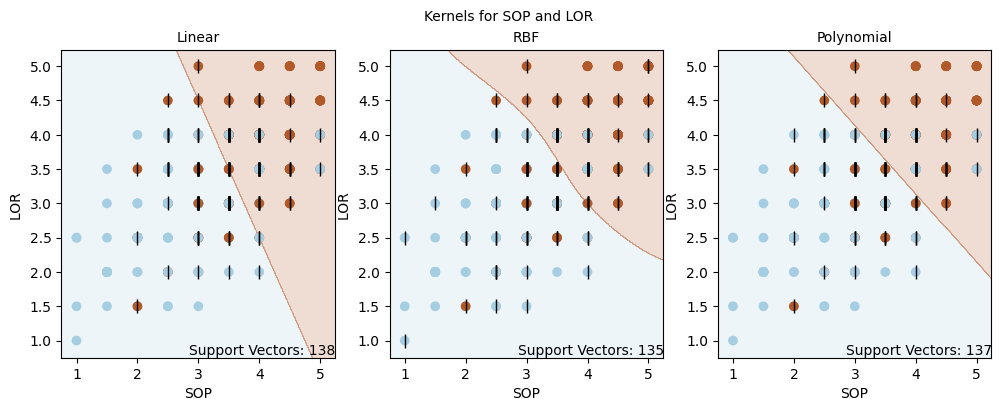

In [28]:
X = train_features[['SOP', 'LOR ']]
svm_linear.fit(X, train_labels)
svm_rbf.fit(X, train_labels)
svm_poly.fit(X, train_labels)

plot_svcs([svm_linear, svm_rbf, svm_poly], X, train_labels)

####4. LOR and GRE Score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


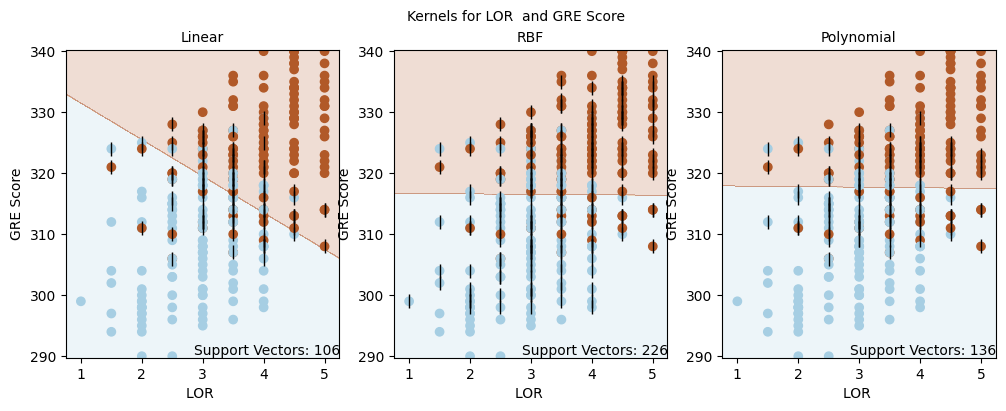

In [29]:
X = train_features[['LOR ', 'GRE Score']]
svm_linear.fit(X, train_labels)
svm_rbf.fit(X, train_labels)
svm_poly.fit(X, train_labels)

plot_svcs([svm_linear, svm_rbf, svm_poly], X, train_labels)

We can check the validation accuracy for all the models to see what combination works best.

In [30]:
feature_combs = [['CGPA', 'SOP'], ['CGPA', 'GRE Score'], ['SOP', 'LOR '], ['LOR ', 'GRE Score']]

def get_best_feature_comb(svc):
  for fc in feature_combs:
    svc.fit(train_features[fc], train_labels)
    preds = svc.predict(validation_features[fc])
    print(f"{fc[0]} {fc[1]} VALIDATION ACCURACY: {(sum(preds == validation_labels) / validation_labels.shape[0] * 100):.4f}")

print("Feature combs for Linear Kernel:")
get_best_feature_comb(SVC(kernel='linear'))
print("")
print("Feature combs for rbf Kernel:")
get_best_feature_comb(SVC(kernel='rbf'))
print("")
print("Feature combs for polynomial Kernel:")
get_best_feature_comb(SVC(kernel='poly', degree=3))

Feature combs for Linear Kernel:
CGPA SOP VALIDATION ACCURACY: 92.1875
CGPA GRE Score VALIDATION ACCURACY: 90.6250
SOP LOR  VALIDATION ACCURACY: 89.0625
LOR  GRE Score VALIDATION ACCURACY: 90.6250

Feature combs for rbf Kernel:
CGPA SOP VALIDATION ACCURACY: 92.1875
CGPA GRE Score VALIDATION ACCURACY: 87.5000
SOP LOR  VALIDATION ACCURACY: 87.5000
LOR  GRE Score VALIDATION ACCURACY: 87.5000

Feature combs for polynomial Kernel:
CGPA SOP VALIDATION ACCURACY: 92.1875
CGPA GRE Score VALIDATION ACCURACY: 87.5000
SOP LOR  VALIDATION ACCURACY: 90.6250
LOR  GRE Score VALIDATION ACCURACY: 87.5000


It appears that the kernels all performed similarly but CGPA and SOP Score was the best feature combination